In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 5: Document Clustering

Document clustering is an important application of clustering algorithms.
Document clustering algorithms can be used to automatically group search results into categories, making it easier to find relevant results.

In this problem, you'll be clustering articles published on [Daily Kos](https://www.dailykos.com/), an American political blog

The file *dailykos.csv* contains data on 3,430 news articles or blogs that have been posted on Daily Kos.
These articles were posted in 2004, leading up to the United States Presidential Election. 

In [3]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/dailykos.csv'
data = pd.read_csv(url)
data

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Each of the features in the dataset is a word that has appeared in at least 50 different articles (1,545 words in total).  For each document, the feature values are the number of times that word appeared in the document.

In [4]:
list_of_words = np.array(data.columns)
list(list_of_words)

['abandon',
 'abc',
 'ability',
 'abortion',
 'absolute',
 'abstain',
 'abu',
 'abuse',
 'accept',
 'access',
 'accomplish',
 'account',
 'accurate',
 'accusations',
 'achieve',
 'acknowledge',
 'act',
 'action',
 'active',
 'activist',
 'actual',
 'add',
 'added',
 'addition',
 'address',
 'admin',
 'administration',
 'admit',
 'advance',
 'advantage',
 'advertise',
 'advised',
 'affair',
 'affect',
 'affiliate',
 'afghanistan',
 'afraid',
 'afternoon',
 'age',
 'agencies',
 'agenda',
 'agree',
 'ahead',
 'aid',
 'aim',
 'air',
 'alaska',
 'allegation',
 'allegory',
 'allied',
 'allowed',
 'alternative',
 'altsite',
 'amazing',
 'amendment',
 'america',
 'american',
 'amount',
 'amp',
 'analysis',
 'analyst',
 'anecdotal',
 'anger',
 'angry',
 'announce',
 'annual',
 'answer',
 'apologies',
 'apparent',
 'appeal',
 'appearance',
 'applied',
 'appointed',
 'approach',
 'approval',
 'apr',
 'april',
 'arab',
 'area',
 'arent',
 'arg',
 'argue',
 'argument',
 'arizona',
 'arm',
 'armstro

## Part 1: k-means clustering

Cluster the articles using k-means, and ensure that you have a good number of clusters (using the "elbow" method, for example).

In [5]:
X = data.to_numpy().astype('float')

In [6]:
def kmeans(X,k,max_iterations=1000):
    from sklearn.metrics import pairwise_distances
    # initialize iteration counter
    it = 0
    repeat = True
    
    # number of datapoints
    m = X.shape[0] 
    
    # initialization
    means = X[np.random.choice(m,k,replace=False)] 
    dist = pairwise_distances(X,means)
    clusters = np.argmin(dist, axis=1)
 
    
    while repeat and it<max_iterations:
        
        # update means; # if a cluster has no data points associated with it, replace it with a random data point
        means = np.array([np.mean(X[clusters==i], axis=0) 
                          if np.sum(clusters==i)!=0
                          else  X[np.random.randint(m)]
                          for i in range(k)])
        
        # update clusters
        dist = pairwise_distances(X,means)
        new_clusters = np.argmin(dist, axis=1)
        
        # check if the new clusters are equal to the previous clusters
        if np.sum(clusters!=new_clusters)==0: 
            repeat = False
        clusters = new_clusters
                
        it += 1 # increment iteration counter by 1
    
    return clusters, means

In [7]:
def inertia(X,means,clusters,k):
    m = len(clusters)
    return np.sum([np.sum((X[clusters==i]-means[i])**2) for i in range(k)])/m

Text(0, 0.5, 'inertia')

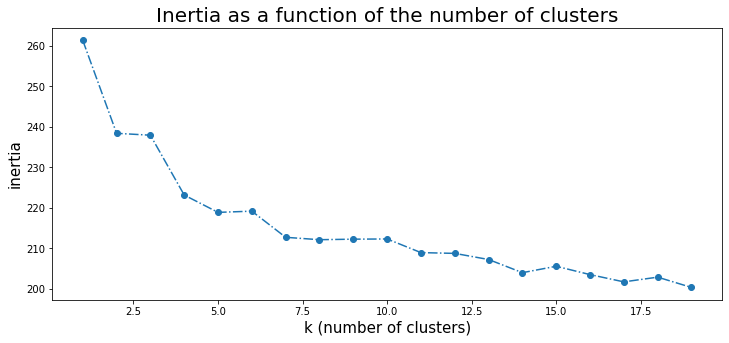

In [9]:
k_min = 1
k_max = 20
inertias = np.zeros(k_max-k_min)
for i,k in enumerate(range(k_min,k_max)):
    clusters,means = kmeans(X,k)
    inertias[i] = inertia(X,means,clusters,k)
    
plt.figure(figsize=(12,5))
plt.plot(range(k_min,k_max),inertias,'o-.')
plt.title('Inertia as a function of the number of clusters',fontsize=20)
plt.xlabel('k (number of clusters)', fontsize=15)
plt.ylabel('inertia', fontsize=15)

In [35]:
k = 5
clusters,means = kmeans(X,k)

## Part 2

In [36]:
# cluster sizes
np.bincount(clusters)

array([ 330, 2173,  369,  283,  275], dtype=int64)

 Find the 10 most frequent words in each cluster.

In [37]:
# cluster 0
data[clusters==0].sum().sort_values(ascending=False).head(10)

november      3422
poll          1600
vote          1465
challenge     1359
bush          1002
democrat       956
republican     913
house          826
senate         778
kerry          772
dtype: int64

In [38]:
# cluster 1
data[clusters==1].sum().sort_values(ascending=False).head(10)

bush          2498
kerry         1787
democrat      1745
poll          1706
republican    1388
elect         1300
state         1203
general       1105
time          1052
campaign      1019
dtype: int64

In [39]:
# cluster 2
data[clusters==2].sum().sort_values(ascending=False).head(10)

bush          3209
kerry         1842
poll           821
presided       674
democrat       506
campaign       492
state          484
voter          426
republican     412
percent        408
dtype: int64

In [40]:
# cluster 3
data[clusters==3].sum().sort_values(ascending=False).head(10)

democrat      1486
dean          1188
kerry          789
state          764
republican     707
parties        676
candidate      670
campaign       634
poll           577
race           497
dtype: int64

In [41]:
# cluster 4
data[clusters==4].sum().sort_values(ascending=False).head(10)

iraq              1140
bush               867
war                813
administration     514
american           474
iraqi              438
official           392
report             370
presided           344
time               329
dtype: int64

In 2004, one of the candidates for the Democratic nomination for the President of the United States was Howard Dean, John Kerry was the candidate who won the democratic nomination, and John Edwards with the running mate of John Kerry (the Vice President nominee). Given this information, which cluster best corresponds to the democratic party?

In [ ]:
# clusters 3

Which k-means cluster best corresponds to the Iraq War?

In [ ]:
# cluster 4

## Part 3: Hierarchical Clustering

Now, run hierarchical clustering (this will probably take you a while. Why?)
Pick the number of clusters equal to the number of clusters you used in parts 1 and 2.

In [42]:
def hierarchical_clustering(X,n_clusters=1):   
    from sklearn.metrics import pairwise_distances
    
     #dataset size, number of features
    m,n = X.shape
    
    # cluster distance matrix
    dist = pairwise_distances(X)
    np.fill_diagonal(dist, np.inf)
    
    # Make each point its own cluster of one
    k = m 
    clusters = np.arange(k)

    # hierarchical clustering iteration'
    while k>n_clusters:  
        
        # find closest clusters
        i, j = np.unravel_index(np.argmin(dist),(k,k))
        i,j = np.sort([i,j]) # reorder the pair (i,j) so that  j>i
        
        # merge clusters
        clusters[clusters==j]=i

        # rename clusters
        clusters[clusters>j] -= 1
        
        # recompute distance from the new cluster i to the remaining clusters'
        dist[i] = np.minimum(dist[i],dist[j]) # 
        dist[:,i] = dist[i] # distance_clusters matrix is symmetric
        dist[i,i]= np.inf # set the distance from cluster i to itself to infinity
            
        # remove row j and column j from distance_clusters matrix
        dist = np.delete(dist,j,0) # remove row j
        dist = np.delete(dist,j,1) # remove column j
        
    
        # reduce number of clusters
        k = k-1

    return clusters

In [43]:
clusteres = hierarchical_clustering(X,n_clusters=k)

In [44]:
# cluser sizes
np.bincount(clusters)

array([ 330, 2173,  369,  283,  275], dtype=int64)